In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import pickle
import os

In [6]:
data_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'

filenames = os.listdir(data_dir)
print(filenames)

['usbeer_merge.pkl', '가축사육현황merge.pkl', '경제성장률merge.pkl', '관측정보_merge.pkl', '수입현황merge.pkl', '축산물_공휴일.pkl', '축산물_시계열 데이터로 변환(전국).pkl']


In [7]:
with open(data_dir+'usbeer_merge.pkl', 'rb') as f:
    usbeef = pickle.load(f)

with open(data_dir+'가축사육현황merge.pkl', 'rb') as f:
    livestock = pickle.load(f)
    
with open(data_dir+'경제성장률merge.pkl', 'rb') as f:
    economic = pickle.load(f)
    
with open(data_dir+'관측정보_merge.pkl', 'rb') as f:
    weather = pickle.load(f)

with open(data_dir+'수입현황merge.pkl', 'rb') as f:
    import_df = pickle.load(f)
    
with open(data_dir+'축산물_공휴일.pkl', 'rb') as f:
    holiday = pickle.load(f)
    
with open(data_dir+'축산물_시계열 데이터로 변환(전국).pkl', 'rb') as f:
    price_ts = pickle.load(f)

In [8]:
print(usbeef.shape)
print(livestock.shape)
print(economic.shape)
print(weather.shape)
print(import_df.shape)
print(holiday.shape)
print(price_ts.shape)

(298, 3)
(298, 21)
(298, 16)
(298, 11)
(298, 8)
(298, 7)
(298, 5)


In [9]:
# livestock 주간날짜 칼럼 -> datetime형태로 바꿔주기
livestock['주간날짜'] = pd.to_datetime(livestock['주간날짜'])

### usbeef 가격 데이터+ 한우가격(y값)

In [10]:
usbeef.head
print(usbeef.columns)

Index(['주간날짜', '한우 평균경매 금액_주간평균', 'price'], dtype='object')


In [11]:
# price -> 생산량_주간평균으로 대체
usbeef = usbeef.rename(columns={'price':'미국소_생산량(가격화한값)'})

In [12]:
del usbeef['한우 평균경매 금액_주간평균']

In [13]:
# 한우 평균경매금액_주간평균 소숫점 2째자리까지만 남기기
usbeef_df = usbeef.copy()
usbeef_df.head(2)

,주간날짜,미국소_생산량(가격화한값)
0,2013-01-06,226130.0
1,2013-01-13,226130.0


### livestock(가축사육현황) 데이터 + 한우가격(y값)

In [14]:
# 모든 칼럼 다 보기
pd.options.display.max_columns = 22
livestock.head()

,연도,월,마리수,번식우,1세미만(암),1세미만(수),1~2세(암),1~2세(수),2세이상(암),2세이상(수),날짜,번식우 아닌 소,"마리 수 중 1세 미만(암,수) 제외","번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),분기,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-06,13875.600000,3044.800000,2013,1
1,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-13,13213.333333,2984.000000,2013,1
2,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-20,12588.833333,2904.000000,2013,1
3,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-01-27,12323.833333,2959.666667,2013,1
4,2013,3,2966,1580,396,470,409,479,996,216,2013-3,1386,2100,520,888,1,2013-02-03,12325.166667,2862.833333,2013,2


In [15]:
# 필요한 칼럼
columns = ['주간날짜','번식우 아닌 소 중 1세 미만(암,수) 제외','1~2세(모든 소)',
          '한우 평균경매 금액_주간평균','돼지 탕박 경매 금액_주간평균']

livestock_df = livestock[columns]
livestock_df['한우 평균경매 금액_주간평균'] = livestock_df['한우 평균경매 금액_주간평균'].round(2)
livestock_df['돼지 탕박 경매 금액_주간평균'] = livestock_df['돼지 탕박 경매 금액_주간평균'].round(2)


C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
livestock_df.head()

,주간날짜,"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균
0,2013-01-06,520,888,13875.60,3044.80
1,2013-01-13,520,888,13213.33,2984.00
2,2013-01-20,520,888,12588.83,2904.00
3,2013-01-27,520,888,12323.83,2959.67
4,2013-02-03,520,888,12325.17,2862.83


### economic(경제성장률) 데이터 + 한우가격(y값)

In [17]:
economic.head()

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%),주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,year,month
0,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-06,13875.600000,3044.800000,2013,1
1,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-13,13213.333333,2984.000000,2013,1
2,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-20,12588.833333,2904.000000,2013,1
3,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-01-27,12323.833333,2959.666667,2013,1
4,2013.0,1370,27178,3,559632,515586,50429,3,98,66061,84,2013-02-03,12325.166667,2862.833333,2013,2


- <소>
    - [양의 상관관계]
        * 국내총생산 0.58 
        * 1인당 gdp 0.55  
        * 총인구 0.79 
        * 소비자물가지수 0.71  
        * 인터넷이용률 0.77  
        * 돼지탕박가격 0.46

    - [음의 상관관계]
        * gdp성장률 -0.59  
        * 수입 -0.53  


- <돼지>- 소와의 가격관계
    - [양의 상관관계]
        * 한우가격 0.46

In [18]:
# 필요한 칼럼 
columns = ['주간날짜','수출 (100만달러)','수입 (100만달러)','소비자물가지수 (2010=100)']

economic_df = economic[columns]
economic_df.head(2)

,주간날짜,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100)
0,2013-01-06,559632,515586,98
1,2013-01-13,559632,515586,98


### import_df(수입소고기 수입현황) 데이터 + 한우가격(y값)

In [19]:
import_df.columns

Index(['주간날짜', '한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균', 'year', 'month',
       'frozen', 'refrigeration', 'total'],
      dtype='object')

In [20]:
# 필요한 칼럼 
columns = ['주간날짜','total']

import_df = import_df[columns]
import_df.head(2)

,주간날짜,total
0,2013-01-06,28623
1,2013-01-13,28623


In [21]:
# total 칼럼명 바꾸기
import_df = import_df.rename(columns={'total':'수입소고기_총량'})
import_df.head(2)

,주간날짜,수입소고기_총량
0,2013-01-06,28623
1,2013-01-13,28623


---

### weather(날씨 관측 데이터) - EDA 더 필요!?

In [22]:
# year, month 칼럼제거
weather_df = weather.drop(['year','month'], axis=1)
weather_df.head(2)

,주간날짜,한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,13875.600000,3044.8,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,13213.333333,2984.0,1.4,-2.2,6.1,0.0,30.0,49.6


In [23]:
weather_df = weather_df.drop(['한우 평균경매 금액_주간평균', '돼지 탕박 경매 금액_주간평균'],axis=1)
weather_df.head(2)

,주간날짜,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,1.4,-2.2,6.1,0.0,30.0,49.6


날씨 데이터가 폐사의 여부를 알기 위해 사용하고자 수집한 데이터이지만 가축관리에 날씨는 영향을 미치기 때문에 해당 값 자체를 변수로 사용하여 모델링에 적용해보고자함.

---

## 데이터 병합

- 우선 더 EDA가 진행되지 않은 관측데이터(weather_df변수)인 상태에서 병합해봄
- 향후 관측데아터의 추가적인 EDA 실시 후 feature selection 필요

In [24]:
from functools import reduce

In [25]:
dfs = [usbeef_df, livestock_df, economic_df, import_df,weather_df]

df_final = reduce(lambda left, right: pd.merge(left, right, on='주간날짜'), dfs)

In [26]:
df_final.head()

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4


In [28]:
with open('final_data.pkl', 'wb') as f:
    pickle.dump(df_final, f)

# 상관관계

C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\a0105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


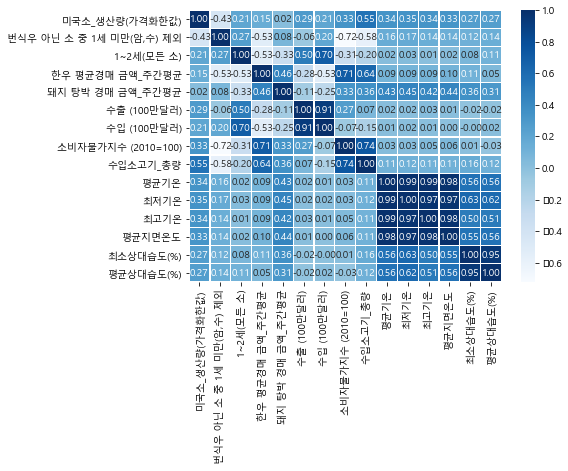

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

corr_data = df_final.drop(["주간날짜"], axis=1)
corr = corr_data.corr()

plt.figure(figsize=(7,5))

sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.2, cmap='Blues')

* '번식우 아닌 소 중 1세 미만(암, 수)제외' & '1~2세(모든 소)' 변수는 각각 -0.53으로 음의 상관관계를 보이고 있음
* '미국소_생산량(가격화한값)' 변수는 0.15로 약한 양의 상관관계를 보이고 있음.
* '돼지 탕박 경매 금액_주간평균' 0.46으로 양의 상관관계를 보이고 있음.
* '수입(100만달러)' 변수는 -0.53으로 음의 상관관계를 보이고 있지만 수입소고기_총량은 0.64로 양의 상관관계를 보이고 있음.
* 기온 관련 변수 모두 매우 약한 상관관계를 보이고 있고 최소상대습도가 0.11로 그나마 높음. 

In [25]:
df_final.tail(50)

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
248,2017-10-08,230300.0,431,866,17473.0,4101.0,573694,478478,102,28200,15.5,13.9,18.0,17.8,59.0,75.9
249,2017-10-15,230300.0,431,866,16445.0,4166.5,573694,478478,102,28200,15.0,11.1,19.4,15.7,50.0,68.1
250,2017-10-22,230300.0,431,866,17379.0,4117.0,573694,478478,102,28200,14.5,10.4,19.6,13.7,38.0,57.0
251,2017-10-29,230300.0,431,866,17251.0,4274.0,573694,478478,102,28200,13.9,6.8,18.3,12.2,34.0,54.3
252,2017-11-05,229060.0,431,866,17384.0,4521.0,573694,478478,102,29673,14.9,9.5,20.4,11.4,20.0,34.5
253,2017-11-12,229060.0,431,866,16807.0,4522.0,573694,478478,102,29673,7.6,2.6,12.2,6.1,15.0,29.9
254,2017-11-19,229060.0,431,866,17043.0,4656.0,573694,478478,102,29673,3.4,-0.2,8.9,2.8,17.0,32.9
255,2017-11-26,229060.0,431,866,17668.0,4604.0,573694,478478,102,29673,5.5,1.2,9.4,5.2,23.0,34.1
256,2017-12-03,214840.0,431,866,17485.0,4681.0,573694,478478,102,30619,2.2,-2.7,7.1,2.6,19.0,34.6
257,2017-12-10,214840.0,431,866,16437.5,4319.5,573694,478478,102,30619,-1.8,-6.2,2.8,-0.6,14.0,27.4


In [26]:
y = df_final['한우 평균경매 금액_주간평균']

In [27]:
x = df_final.drop(['주간날짜','한우 평균경매 금액_주간평균'],axis=1)

In [28]:
x.dtypes

미국소_생산량(가격화한값)              float64
번식우 아닌 소 중 1세 미만(암,수) 제외      int32
1~2세(모든 소)                    int32
돼지 탕박 경매 금액_주간평균            float64
수출 (100만달러)                   int32
수입 (100만달러)                   int32
소비자물가지수 (2010=100)            int32
수입소고기_총량                      int64
평균기온                        float64
최저기온                        float64
최고기온                        float64
평균지면온도                      float64
최소상대습도(%)                   float64
평균상대습도(%)                   float64
dtype: object

In [29]:
from sklearn import preprocessing

features = ['미국소_생산량(가격화한값)', '번식우 아닌 소 중 1세 미만(암,수) 제외', '1~2세(모든 소)','돼지 탕박 경매 금액_주간평균', '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)','수입소고기_총량','평균기온','최소상대습도(%)']

# 이상치에 민감하지 않은 robustsclaer적용 (돼지탕박경매금액_주간평균에 이상치가 포함되어 있었기 때문)
robust_scaler = preprocessing.RobustScaler()
np_scaled_data = robust_scaler.fit_transform(df_final[features])
scaled_data = df_final.copy()


In [30]:
scaled_data

,주간날짜,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),한우 평균경매 금액_주간평균,돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%)
0,2013-01-06,226130.0,520,888,13875.60,3044.80,559632,515586,98,28623,-0.3,-4.6,5.4,-2.5,16.0,29.6
1,2013-01-13,226130.0,520,888,13213.33,2984.00,559632,515586,98,28623,1.4,-2.2,6.1,0.0,30.0,49.6
2,2013-01-20,226130.0,520,888,12588.83,2904.00,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9
3,2013-01-27,226130.0,520,888,12323.83,2959.67,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0
4,2013-02-03,187340.0,520,888,12325.17,2862.83,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2018-08-19,242960.0,486,887,16835.00,5305.00,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4
294,2018-08-26,242960.0,486,887,17555.00,5207.50,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4
295,2018-09-02,215750.0,486,887,18369.00,5548.00,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1
296,2018-09-09,215750.0,486,887,18757.00,5754.00,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3


In [31]:
scaled_data[features] = np_scaled_data 

In [32]:
split_date = '2018-02-07'

df_final_train = scaled_data[scaled_data['주간날짜'] <= split_date].copy()
df_final_test = scaled_data[scaled_data['주간날짜'] > split_date].copy()

In [33]:
df_final_train_x = df_final_train[features]
df_final_train_y = df_final_train['한우 평균경매 금액_주간평균']

In [34]:
df_final_test_x = df_final_test[features]
df_final_test_y = df_final_test['한우 평균경매 금액_주간평균']

In [35]:
df_final_train_x

,미국소_생산량(가격화한값),"번식우 아닌 소 중 1세 미만(암,수) 제외",1~2세(모든 소),돼지 탕박 경매 금액_주간평균,수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최소상대습도(%)
0,0.765068,-0.244681,0.55,-1.557303,0.000000,0.416869,-0.666667,0.413858,-0.955590,-0.607143
1,0.765068,-0.244681,0.55,-1.621055,0.000000,0.416869,-0.666667,0.413858,-0.851455,-0.107143
2,0.765068,-0.244681,0.55,-1.704939,0.000000,0.416869,-0.666667,0.413858,-0.845329,0.250000
3,0.765068,-0.244681,0.55,-1.646566,0.000000,0.416869,-0.666667,0.413858,-0.704441,0.250000
4,-0.941487,-0.244681,0.55,-1.748107,0.000000,0.416869,-0.666667,-0.988451,-0.845329,-0.392857
...,...,...,...,...,...,...,...,...,...,...
261,0.842939,-1.031915,0.05,-0.454021,0.963589,0.637234,1.333333,0.752752,-1.029096,-0.535714
262,0.842939,-1.031915,0.05,-2.620845,0.963589,0.637234,1.333333,0.752752,-0.581930,-0.428571
263,0.842939,-1.031915,0.05,-0.476041,0.963589,0.637234,1.333333,0.752752,-1.384380,-0.678571
264,0.842939,-1.031915,0.05,-0.128971,0.963589,0.637234,1.333333,0.752752,-1.022971,-0.642857


In [36]:
import xgboost

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import plot_importance, plot_tree

xgb =xgboost.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 5)
xgb.fit(df_final_train_x,df_final_train_y, eval_set = [(df_final_train_x,df_final_train_y), (df_final_test_x,df_final_test_y)], early_stopping_rounds = 50, verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [37]:
df_final_test['Prediction'] = xgb.predict(df_final_test_x)

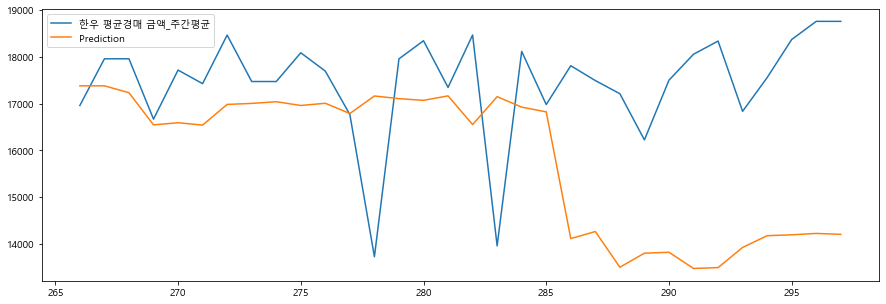

In [38]:
df_final_test.columns
df_final_test[['한우 평균경매 금액_주간평균','Prediction']].plot(figsize=(15, 5))

In [39]:
mean_accuracy = xgb.score(df_final_test_x,df_final_test_y)
print('mean_accuracy = {}'.format(mean_accuracy))

mean_accuracy = -4.467187066631372


In [40]:
gbm = xgboost.XGBRegressor()
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
reg_cv.fit(df_final_train_x,df_final_train_y)
print(reg_cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
gbm = xgboost.XGBRegressor(**reg_cv.best_params_)
gbm.fit(x_train,y_train)

predictions = gbm.predict(x_test)
predictions

In [71]:
gbm.score(x_test,y_test)

-3.912122183930835

In [70]:
gbm.score(x_train,y_train)

0.9999999998892598

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_pred = xgb.predict(x_train)
mse = mean_squared_error(y_train, xgb_pred)
mae = mean_absolute_error(y_train, xgb_pred)
mean_accuracy = xgb.score(x_train,y_train)

print('Root mean squared error: ', np.sqrt(mse))
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  43.51565592271917
Mean absolute error:  31.586525315504787
accuracy:  0.9996895104015703


In [51]:
xgb_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
mae = mean_absolute_error(y_test, xgb_pred)
mean_accuracy = xgb.score(x_test,y_test)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  1914.432483255987
R2 score:  -4.176979026620514
Mean absolute error:  1485.4278971354167
accuracy:  -4.176979026620514


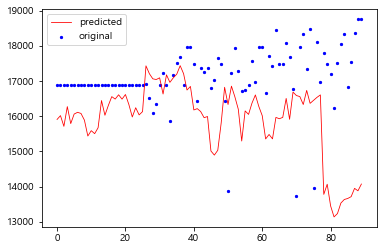

In [57]:
pjme_test['MW_Prediction'] = xgb.predict(x_train)
pjme_all = pd.concat([pjme_test, pjme_train], sort=False)

pjme_all[['PJME_MW','MW_Prediction']].plot(figsize=(15, 5))

In [35]:

kf = KFold(n_splits=5,shuffle=True)
print(type(kf))

fold_idx = 1

for train_idx, test_idx in kf.split(scaled_data):
    
    train_d, test_d = scaled_data.iloc[train_idx], scaled_data.iloc[test_idx]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    
    xgb =xgboost.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 5)
    xgb.fit(train_x,train_y)


<class 'sklearn.model_selection._split.KFold'>
mean_accuracy = 0.8094769982696233
mean_accuracy = 0.9148223954930755
mean_accuracy = 0.9296161217121144
mean_accuracy = 0.9082859004820361
mean_accuracy = 0.919251106137997


In [77]:
    from sklearn.ensemble import RandomForestRegressor

    train_d, test_d = scaled_data.iloc[0:220,:], scaled_data.iloc[221:,:]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    
    xgb =RandomForestRegressor(oob_score=True,n_estimators=130, max_features='sqrt')
    xgb.fit(train_x,train_y)
    
    mean_accuracy = xgb.score(test_x,test_y)
    print('mean_accuracy = {}'.format(mean_accuracy))

mean_accuracy = -2.433742428417678


In [36]:
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=5,shuffle=True)

print(type(kf))

fold_idx = 1

for train_idx, test_idx in kf.split(scaled_data):
    
    train_d, test_d = scaled_data.iloc[train_idx], scaled_data.iloc[test_idx]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    
    rf =RandomForestRegressor(oob_score=True,n_estimators=130, max_features='sqrt')
    rf.fit(train_x,train_y)
    
    mean_accuracy = rf.score(test_x,test_y)
    print('mean_accuracy = {}'.format(mean_accuracy))

<class 'sklearn.model_selection._split.KFold'>
mean_accuracy = 0.9239544104994935
mean_accuracy = 0.9026783112049828
mean_accuracy = 0.9161683246144982
mean_accuracy = 0.9113486186215819
mean_accuracy = 0.8591472720771619


In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_pred = xgb.predict(test_x)
mse = mean_squared_error(test_y, xgb_pred)
r2 = r2_score(test_y, xgb_pred)
mae = mean_absolute_error(test_y, xgb_pred)
mean_accuracy = xgb.score(test_x,test_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  224.68634922004603
R2 score:  0.9890511361198379
Mean absolute error:  119.31300913665257
accuracy:  0.9890511361198379


In [38]:
xgb_pred = xgb.predict(train_x)
mse = mean_squared_error(train_y, xgb_pred)
mae = mean_absolute_error(train_y, xgb_pred)
mean_accuracy = xgb.score(train_x,train_y)

print('Root mean squared error: ', np.sqrt(mse))
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  284.8315393720653
Mean absolute error:  126.47903798378661
accuracy:  0.9846629448394827


* train set에 적용된 모델의 정확도는 0.984 test set에 적용된 모델의 정확도는 0.980, R2은  0.980으로 정확도와 설명력이 높음 

In [39]:
rf_pred = rf.predict(test_x)
mse = mean_squared_error(test_y, rf_pred)
r2 = r2_score(test_y, rf_pred)
mae = mean_absolute_error(test_y, rf_pred)
mean_accuracy = rf.score(test_x,test_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  805.8881887466008
R2 score:  0.8591472720771619
Mean absolute error:  575.9893455019558
accuracy:  0.8591472720771619


* 정확도, r2 socre, mse,m mae를 비교하였을 때 xgboostm의 성능이 더 좋음

## 중요변수 도출 

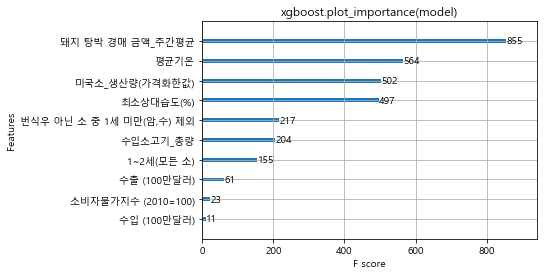

In [40]:
xgboost.plot_importance(xgb)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [41]:
# xgboost.plot_importance(xgb, importance_type="cover")
# plt.title('xgboost.plot_importance(model, importance_type="cover")')
# plt.show()

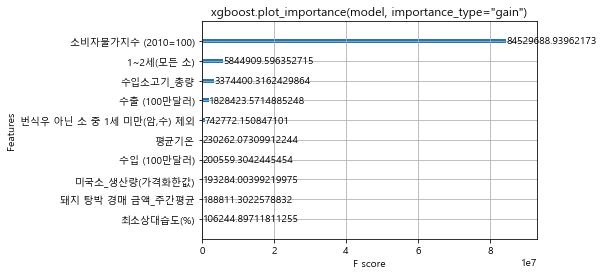

In [42]:
xgboost.plot_importance(xgb, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="gain")')
plt.show()

In [43]:
features.remove('돼지 탕박 경매 금액_주간평균')

In [44]:
from sklearn.model_selection import KFold
import xgboost

kf = KFold(n_splits=5,shuffle=True)
print(type(kf))

fold_idx = 1

for train_idx, test_idx in kf.split(scaled_data):
    
    train_d, test_d = scaled_data.iloc[train_idx], scaled_data.iloc[test_idx]
    
    train_y = train_d['한우 평균경매 금액_주간평균']
    train_x = train_d[features]
    
    test_y = test_d['한우 평균경매 금액_주간평균']
    test_x = test_d[features]
    
    xgb =xgboost.XGBRegressor(n_estimators = 200, learning_rate = 0.1, max_depth = 5)
    xgb.fit(train_x,train_y)
    
    mean_accuracy = xgb.score(test_x,test_y)
    print('mean_accuracy = {}'.format(mean_accuracy))

<class 'sklearn.model_selection._split.KFold'>
mean_accuracy = 0.9111416857975825
mean_accuracy = 0.8968704225206232
mean_accuracy = 0.8051995962289753
mean_accuracy = 0.8337163617716958
mean_accuracy = 0.9025832163802117


In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_pred = xgb.predict(test_x)
mse = mean_squared_error(test_y, xgb_pred)
r2 = r2_score(test_y, xgb_pred)
mae = mean_absolute_error(test_y, xgb_pred)
mean_accuracy = xgb.score(test_x,test_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  716.7952007707879
R2 score:  0.9025832163802117
Mean absolute error:  531.0327072298728
accuracy:  0.9025832163802117


In [46]:
xgb_pred = xgb.predict(train_x)
mse = mean_squared_error(train_y, xgb_pred)
r2 = r2_score(train_y, xgb_pred)
mae = mean_absolute_error(train_y, xgb_pred)
mean_accuracy = xgb.score(train_x,train_y)

print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)
print('Mean absolute error: ', mae)
print('accuracy: ', mean_accuracy)

Root mean squared error:  85.10924260095406
R2 score:  0.9985735858122554
Mean absolute error:  61.211599110878645
accuracy:  0.9985735858122554


* 돼지탕박경매금액을 빼고한 것 성능이 낮진 않으나 오버피팅되고 있음. 튜닝필요

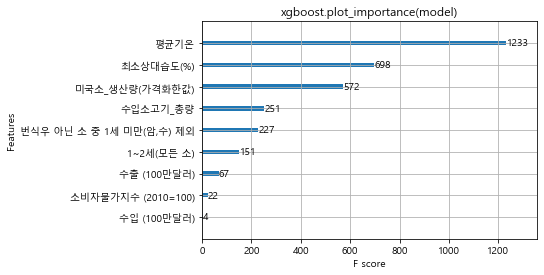

In [47]:
xgboost.plot_importance(xgb)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [48]:
# xgboost.plot_importance(xgb, importance_type="cover")
# plt.title('xgboost.plot_importance(model, importance_type="cover")')
# plt.show()